# Task 1

# a

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = [
    "Id",
    "RI",
    "Na",
    "Mg",
    "Al",
    "Si",
    "K",
    "Ca",
    "Ba",
    "Fe",
    "Type",
]

df = pd.read_csv(url, header=None, names=column_names)
print(df.head())


   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [3]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [4]:
df["Type"].value_counts()  # with considering it , using multiclass

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipelines = {
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC())
    ])
}

param_grids = {
    'RandomForest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20],
    },
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
    }
}

In [6]:
# I used StandardScaler because different range valuse in features

In [7]:
pipelines = {
    'LogisticRegression': Pipeline([  # Updated to use Logistic Regression
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression())
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC())
    ])
}

param_grids = {
    'LogisticRegression': {
        'clf__C': [0.1, 1, 10],
        'clf__penalty': ['l1', 'l2']
    },
    'SVM': {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
    }
}

In [8]:
#Find the best model

In [9]:
best_params = {}
best_models = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit

In [10]:
# Evaluate the best models

In [11]:
results = {}
for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy


In [12]:
for model_name, accuracy in results.items():
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

LogisticRegression: Accuracy = 0.98
SVM: Accuracy = 0.95


In [13]:
for model_name, params in best_params.items():
    print(f"Best parameters for {model_name}: {params}")

Best parameters for LogisticRegression: {'clf__C': 10, 'clf__penalty': 'l2'}
Best parameters for SVM: {'clf__C': 10, 'clf__kernel': 'linear'}


# b

In [14]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

cv_methods = {
    'K-Fold': KFold(n_splits=5, shuffle=True, random_state=42),
    'Stratified K-Fold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    'Leave-One-Out': LeaveOneOut()
}

In [15]:
results = {}
for model_name, model in pipelines.items():
    for cv_name, cv_method in cv_methods.items():
        scores = cross_val_score(model, X, y, cv=cv_method, scoring='accuracy')
        avg_accuracy = np.mean(scores)
        results[f'{model_name} ({cv_name})'] = avg_accuracy

# Print the results
for result_name, accuracy in results.items():
    print(f"{result_name}: Mean Accuracy = {accuracy:.2f}")

LogisticRegression (K-Fold): Mean Accuracy = 0.90
LogisticRegression (Stratified K-Fold): Mean Accuracy = 0.90
LogisticRegression (Leave-One-Out): Mean Accuracy = 0.91
SVM (K-Fold): Mean Accuracy = 0.85
SVM (Stratified K-Fold): Mean Accuracy = 0.86
SVM (Leave-One-Out): Mean Accuracy = 0.88


# C

In [16]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)

accuracy = tpot.score(X_test, y_test)
print(f"AutoML (TPOT) Test Accuracy: {accuracy:.2f}")

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9823529411764707

Generation 2 - Current best internal CV score: 0.9823529411764707

Generation 3 - Current best internal CV score: 0.9825210084033614

Generation 4 - Current best internal CV score: 0.9884033613445379

Generation 5 - Current best internal CV score: 0.9884033613445379

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.9500000000000001, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
AutoML (TPOT) Test Accuracy: 0.98


# Task 2

# a

import zipfile

zip_file_path = r"C:\Users\User\Desktop\New Faradars\archive.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    csv_file_name = "sonar.all-data.csv"
    with zip_ref.open(csv_file_name) as file:
        df = pd.read_csv(file)
df.head(10)

In [17]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
column_names = ['freq_' + str(i) for i in range(1, 60)] + ['Label']
df = pd.read_csv(url, header=None, names=column_names)
df

,freq_1,freq_2,freq_3,freq_4,freq_5,freq_6,freq_7,freq_8,freq_9,freq_10,...,freq_51,freq_52,freq_53,freq_54,freq_55,freq_56,freq_57,freq_58,freq_59,Label
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [18]:
#df.rename(columns={Label: 'Target'}, inplace=True)
df['Label'] = df['Label'].map({'M': 0, 'R': 1})
print(df.head())


        freq_1  freq_2  freq_3  freq_4  freq_5  freq_6  freq_7  freq_8  \
0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

        freq_9  freq_10  ...  freq_51  freq_52  freq_53  freq_54  freq_55  \
0.0200  0.2111   0.1609  ...   0.0027   0.0065   0.0159   0.0072   0.0167   
0.0453  0.2872   0.4918  ...   0.0084   0.0089   0.0048   0.0094   0.0191   
0.0262  0.6194   0.6333  ...   0.0232   0.0166   0.0095   0.0180   0.0244   
0.0100  0.1264   0.0881  ...   0.0121   0.0036   0.0150   0.0085   0.0073   
0.0762  0.4459   0.4152  ...   0.0031   0.0054   0.0105   0.0110   0.0015   

        freq_56  freq_57  freq_58  freq_59  Label  
0.0200   0.0180   0.0084   0.0090   0.00

In [19]:
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)


In [21]:
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=cv,
    n_jobs=-1  # Use all available CPU cores
)

In [22]:
y_train = y_train.fillna(0)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

validation_accuracy = best_estimator.score(X_val, y_val)
print("Validation Accuracy:", validation_accuracy)

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(random_state=42)
Validation Accuracy: 0.8333333333333334


# b

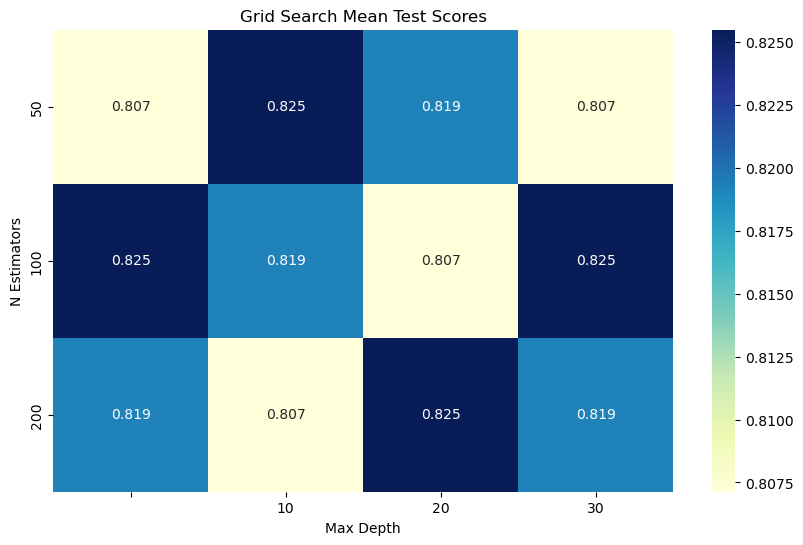

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the grid search results as a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract the mean test scores and reshape them into a grid
mean_test_scores = results_df['mean_test_score'].values.reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=param_grid['max_depth'], yticklabels=param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.title('Grid Search Mean Test Scores')
plt.show()

# c

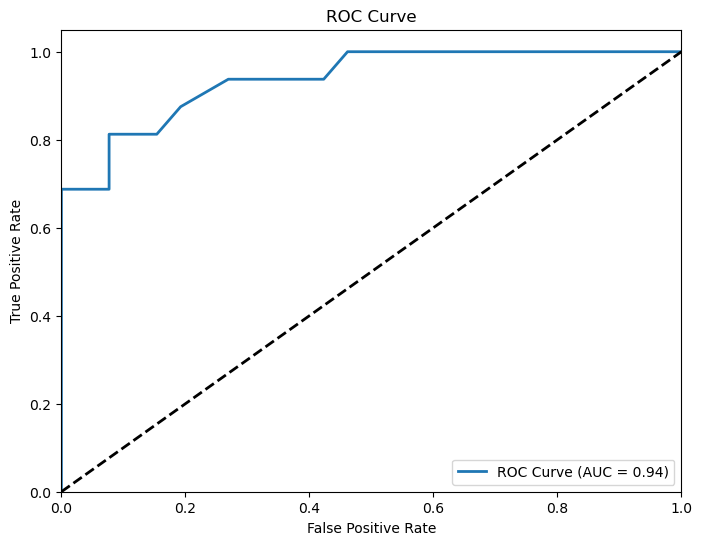

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

best_estimator.fit(X_train, y_train)

y_pred_prob = best_estimator.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

auc = roc_auc_score(y_val, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Random Classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Task 3

In [25]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

test_data = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

concatenated_data = {
    'data': list(train_data.data) + list(test_data.data),
    'target': list(train_data.target) + list(test_data.target)
}

concatenated_texts = concatenated_data['data']
concatenated_labels = concatenated_data['target']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups


# Create a TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(concatenated_texts)

# Apply K-means clustering
num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Print true class vs cluster distribution
df = pd.DataFrame({'True Class': concatenated_labels , 'Cluster': cluster_labels})
print(df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


       True Class  Cluster
0               7       13
1               4        9
2               4        3
3               1        1
4              14       18
...           ...      ...
18841          14       10
18842           4        7
18843           9       15
18844           6        6
18845          15        8

[18846 rows x 2 columns]


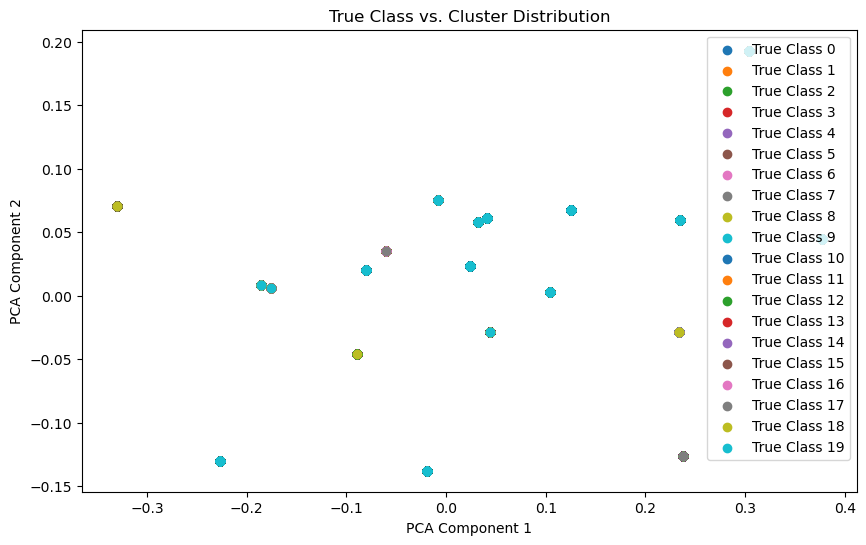

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))

# Iterate through each true class (0 to 19) and plot data points in different colors
for true_class in range(20):
    cluster_indices = df[df['True Class'] == true_class]['Cluster']
    x = reduced_data[cluster_indices]
    plt.scatter(x[:, 0], x[:, 1], label=f'True Class {true_class}')

plt.title("True Class vs. Cluster Distribution")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='upper right')
plt.show()


True Class vs Cluster Distribution:
[[  7   0  83  47  83   6   0   9  97  10  82  42   0  42   0  85   0   0
   45 161]
 [ 19   8  49  37 130 189   2  31  73  90  35   9  43  18   2  83  38   5
  104   8]
 [ 15   5  53  17 123  63   2  31  53  35  26   2 327  17  19  66  57   5
   61   8]
 [ 12  14  58  13  70  97   9  19  61  54  23   1  44  17 160  74 130   1
  113  12]
 [ 11  14  53  12 121 106  11  11  73  47  33  10   3  24 100 113  48   3
  162   8]
 [ 18   2  52  35  99 170   1  28  96  62  35   0  65  14   1 134   8   6
  143  19]
 [ 12  16  24   5 121  13 400  19  31  65  20   6  10   8  49  40  31  69
   30   6]
 [ 20   3  76  65 148  51  12  13  72  29  77  24   1  76   6 128   0   3
  153  33]
 [ 18   2 132  73 155  30  14  11  54  17  79  34   0  86  13 130   0   0
  126  22]
 [  9   2  42  59 171  28   0  18  43  31  31 214   0  69   0  79   0  10
  153  35]
 [  8   4  53 103 137  15   0  19  24  21  31 148   0  94   0  89   0  51
  182  20]
 [ 16  52  55  86 121  23   0

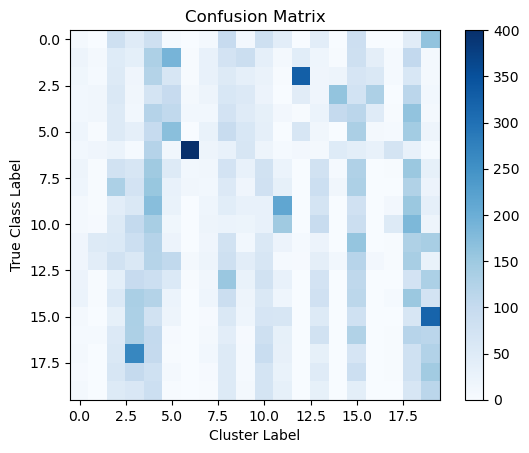

In [29]:
# Map the true class labels to cluster labels
from sklearn.metrics import confusion_matrix

cluster_labels = kmeans.labels_

confusion = confusion_matrix(concatenated_labels, cluster_labels)

print("True Class vs Cluster Distribution:")
print(confusion)

plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Cluster Label")
plt.ylabel("True Class Label")
plt.show()

